In [1]:
%matplotlib qt

# std
import os
from os import path
import time

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, plots, metrics, statistics as stats
from src.configuration import cfg, cfg_mr
os.chdir('analysis-adelie')

# ttest
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
matplotlib.rc('font', **font)

In [2]:
# defining frequency bands
cfg['bands'] = {'gamma': [40, 100], 'beta': [12, 40], 'alpha': [8, 12], 'theta': [4, 8], 'delta': [1, 4]}

# defining ratios
ratioList = ['gamma / beta', 'gamma / alpha', 'gamma / theta', 'gamma / delta', 'beta / alpha', 'beta / theta', 'beta / delta', 'alpha / theta', 'alpha / delta', 'theta / delta']

Recordings of March

In [302]:
# Adélie's data
baseline_bandpowers_adelie = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='adelie')
meditation_bandpowers_adelie = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='adelie')

merged_bandpower_adelie = pd.concat([baseline_bandpowers_adelie, meditation_bandpowers_adelie], keys=["baseline", "meditation"])

In [303]:
# Sam's data
baseline_bandpowers_sam = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam')
meditation_bandpowers_sam = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam')

merged_bandpower_sam = pd.concat([baseline_bandpowers_sam, meditation_bandpowers_sam], keys=["baseline", "meditation"])

Recordings of May 1

In [304]:
# Sam2's data
baseline_bandpowers_sam2 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam2')
meditation_bandpowers_sam2 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam2')

merged_bandpower_sam2 = pd.concat([baseline_bandpowers_sam2, meditation_bandpowers_sam2], keys=["baseline", "meditation"])

In [305]:
# Raphaël's data
baseline_bandpowers_rap = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael')
meditation_bandpowers_rap = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael')

merged_bandpower_rap = pd.concat([baseline_bandpowers_rap, meditation_bandpowers_rap], keys=["baseline", "meditation"])

Recordings of May 2

In [306]:
# Raphaël2's data
baseline_bandpowers_rap2 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael2')
meditation_bandpowers_rap2 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael2')

merged_bandpower_rap2 = pd.concat([baseline_bandpowers_rap2, meditation_bandpowers_rap2], keys=["baseline", "meditation"])

In [307]:
# Raphaël3's data
baseline_bandpowers_rap3 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='raphael3')
meditation_bandpowers_rap3 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='raphael3')

merged_bandpower_rap3 = pd.concat([baseline_bandpowers_rap3, meditation_bandpowers_rap3], keys=["baseline", "meditation"])

In [308]:
# Sam3's data
baseline_bandpowers_sam3 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam3')
meditation_bandpowers_sam3 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam3')

merged_bandpower_sam3 = pd.concat([baseline_bandpowers_sam3, meditation_bandpowers_sam3], keys=["baseline", "meditation"])

In [309]:
# Arnaud's data
baseline_bandpowers_arn = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='arnaud')
meditation_bandpowers_arn = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='arnaud')

merged_bandpower_arn = pd.concat([baseline_bandpowers_arn, meditation_bandpowers_arn], keys=["baseline", "meditation"])

Recordings of June

In [310]:
# Sam4's data
baseline_bandpowers_sam4 = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='sam4')
meditation_bandpowers_sam4 = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='sam4')

merged_bandpower_sam4 = pd.concat([baseline_bandpowers_sam4, meditation_bandpowers_sam4], keys=["baseline", "meditation"])

Matthieu Ricard

In [3]:
# MR data
baseline_bandpowers_mr = helpers.load_bandpower_all_epochs_all_recordings_df('baseline', subject='mr', config=cfg_mr)
meditation_bandpowers_mr = helpers.load_bandpower_all_epochs_all_recordings_df('meditation', subject='mr', config=cfg_mr)

merged_bandpower_mr = pd.concat([baseline_bandpowers_mr, meditation_bandpowers_mr], keys=["baseline", "meditation"])

C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


### Create heatmap with results

In [420]:
# compute ratios for naive metrics meditation/baseline

ratio_naive_ad = metrics.get_avg_ratio(baseline_bandpowers_adelie, meditation_bandpowers_adelie, "Adélie")
ratio_naive_sam = metrics.get_avg_ratio(baseline_bandpowers_sam, meditation_bandpowers_sam, "Sam")
ratio_naive_sam2 = metrics.get_avg_ratio(baseline_bandpowers_sam2, meditation_bandpowers_sam2, "Sam2")
ratio_naive_sam3 = metrics.get_avg_ratio(baseline_bandpowers_sam3, meditation_bandpowers_sam3, "Sam3")
ratio_naive_sam4 = metrics.get_avg_ratio(baseline_bandpowers_sam4, meditation_bandpowers_sam4, "Sam4")
ratio_naive_rap = metrics.get_avg_ratio(baseline_bandpowers_rap, meditation_bandpowers_rap, "Raphaël")
ratio_naive_rap2 = metrics.get_avg_ratio(baseline_bandpowers_rap2, meditation_bandpowers_rap2, "Raphaël2")
ratio_naive_rap3 = metrics.get_avg_ratio(baseline_bandpowers_rap3, meditation_bandpowers_rap3, "Raphaël3")
ratio_naive_arn = metrics.get_avg_ratio(baseline_bandpowers_arn, meditation_bandpowers_arn, "Arnaud")

ratio_naive_concat = pd.concat([ratio_naive_ad, ratio_naive_sam, ratio_naive_sam2, ratio_naive_sam3, ratio_naive_sam4, ratio_naive_rap, ratio_naive_rap2, ratio_naive_rap3, ratio_naive_arn], axis=1)

In [357]:
# check significant pvalues

pvalues_naive_ad = pd.DataFrame(p_values_naive_metrics_adelie[p_values_naive_metrics_adelie < FWER_threshold]['AVG']).rename(columns={'AVG': 'Adélie'})
pvalues_naive_sam = pd.DataFrame(p_values_naive_metrics_sam[p_values_naive_metrics_sam < FWER_threshold]['AVG']).rename(columns={'AVG': 'Sam'})
pvalues_naive_sam2 = pd.DataFrame(p_values_naive_metrics_sam2[p_values_naive_metrics_sam2 < FWER_threshold]['AVG']).rename(columns={'AVG': 'Sam2'})
pvalues_naive_sam3 = pd.DataFrame(p_values_naive_metrics_sam3[p_values_naive_metrics_sam3 < FWER_threshold]['AVG']).rename(columns={'AVG': 'Sam3'})
pvalues_naive_sam4 = pd.DataFrame(p_values_naive_metrics_sam4[p_values_naive_metrics_sam4 < FWER_threshold]['AVG']).rename(columns={'AVG': 'Sam4'})
pvalues_naive_rap = pd.DataFrame(p_values_naive_metrics_rap[p_values_naive_metrics_rap < FWER_threshold]['AVG']).rename(columns={'AVG': 'Raphaël'})
pvalues_naive_rap2 = pd.DataFrame(p_values_naive_metrics_rap2[p_values_naive_metrics_rap2 < FWER_threshold]['AVG']).rename(columns={'AVG': 'Raphaël2'})
pvalues_naive_rap3 = pd.DataFrame(p_values_naive_metrics_rap3[p_values_naive_metrics_rap3 < FWER_threshold]['AVG']).rename(columns={'AVG': 'Raphaël3'})
pvalues_naive_arn = pd.DataFrame(p_values_naive_metrics_arn[p_values_naive_metrics_arn < FWER_threshold]['AVG']).rename(columns={'AVG': 'Arnaud'})

pvalues_naive_concat = pd.concat([pvalues_naive_ad, pvalues_naive_sam, pvalues_naive_sam2, pvalues_naive_sam3, pvalues_naive_sam4, pvalues_naive_rap, pvalues_naive_rap2, pvalues_naive_rap3, pvalues_naive_arn], axis=1)
pvalues_naive_concat

,Adélie,Sam,Sam2,Sam3,Sam4,Raphaël,Raphaël2,Raphaël3,Arnaud
alpha,NaN,NaN,0.000005,NaN,5.834768e-07,3.429460e-09,1.561900e-11,0.000992,NaN
alpha / delta,NaN,NaN,NaN,1.401987e-04,NaN,NaN,1.310326e-07,NaN,NaN
alpha / theta,NaN,NaN,0.000159,2.887665e-04,NaN,NaN,2.690482e-06,NaN,NaN
beta,NaN,NaN,0.000132,NaN,7.246397e-06,1.023977e-12,3.221573e-06,0.000065,NaN
beta / alpha,NaN,NaN,NaN,1.398028e-07,NaN,NaN,7.500595e-04,NaN,NaN
beta / delta,NaN,NaN,NaN,NaN,1.374868e-09,2.936085e-07,1.818490e-03,0.001937,NaN
beta / theta,NaN,NaN,0.000027,NaN,9.111590e-07,5.379006e-05,NaN,NaN,0.000039
delta,NaN,NaN,0.001670,NaN,NaN,4.770767e-07,NaN,0.000872,NaN
gamma,NaN,NaN,0.000387,2.838601e-03,3.151363e-08,1.644085e-12,NaN,NaN,NaN
gamma / alpha,NaN,NaN,NaN,2.865550e-10,3.011160e-03,NaN,9.307801e-04,NaN,NaN


In [415]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

subjects = ratio_naive_concat.columns.to_list()
ratio_naive = ratio_naive_concat.index.to_list()

array_pvalues_naive_concat = np.array(pvalues_naive_concat)

array_ratio_naive = np.array(ratio_naive_concat)

fig, ax = plt.subplots()
im = ax.imshow(array_ratio_naive)

# We want to show all ticks...
ax.set_xticks(np.arange(len(subjects)))
ax.set_yticks(np.arange(len(ratio_naive)))

# ... and label them with the respective list entries
ax.set_xticklabels(subjects)
ax.set_yticklabels(ratio_naive)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ratio_naive)):
    for j in range(len(subjects)):
        if str(array_pvalues_naive_concat[i, j]) == 'nan':
            text = ax.text(j, i, '', ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, '*', ha="center", va="center", color="k")

ax.set_title("Ratio meditation/baseline for the fifteen naive metrics \n *pvalue < 0.0033")

plt.set_cmap('RdBu')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Log scale', rotation=-90, va="bottom")

fig.tight_layout()
plt.show()

In [6]:
# Matthieu Ricard only

ratio_naive_mr = metrics.get_avg_ratio(baseline_bandpowers_mr, meditation_bandpowers_mr, "Matthieu Ricard")
pvalues_naive_mr = pd.DataFrame(p_values_naive_metrics_mr[p_values_naive_metrics_mr < FWER_threshold]['AVG']).rename(columns={'AVG': 'Matthieu Ricard'})

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

subjects = ratio_naive_mr.columns.to_list()
ratio_naive = ratio_naive_mr.index.to_list()

array_pvalues_naive_concat = np.array(pvalues_naive_mr)

array_ratio_naive = np.array(ratio_naive_mr)

fig, ax = plt.subplots()
im = ax.imshow(array_ratio_naive)

# We want to show all ticks...
ax.set_xticks(np.arange(len(subjects)))
ax.set_yticks(np.arange(len(ratio_naive)))

# ... and label them with the respective list entries
ax.set_xticklabels(subjects)
ax.set_yticklabels(ratio_naive)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ratio_naive)):
    for j in range(len(subjects)):
        if str(array_pvalues_naive_concat[i, j]) == 'nan':
            text = ax.text(j, i, '', ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, '*', ha="center", va="center", color="k")

ax.set_title("Ratio meditation/baseline for the fifteen naive metrics \n *pvalue < 0.0033")

plt.set_cmap('RdBu')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Log scale', rotation=-90, va="bottom")

fig.tight_layout()
plt.show()

### Mean spectral band powers with bar errors, baseline vs. meditation

In [416]:
# bandpowers Adélie
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_adelie, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Adélie")

In [207]:
# bandpowers Sam
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Sam")

In [211]:
# bandpowers Sam2
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam2, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Sam2")

In [212]:
# bandpowers Sam3
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam3, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Sam3")

In [213]:
# bandpowers Sam4
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam4, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Sam4")

In [214]:
# bandpowers Raphaël
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Raphaël")

In [215]:
# bandpowers Raphaël2
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap2, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Raphaël2")

In [236]:
# bandpowers Raphaël3
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap3, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Raphaël3")

In [237]:
# bandpowers Arnaud
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_arn, bands_to_plot=cfg['bands'],
                                        title="Mean spectral band powers with bar errors, baseline vs. meditation for Arnaud")

### Mean spectral band power ratios with bar errors, baseline vs. meditation

In [417]:
# bandpower ratios Adélie
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_adelie, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Adélie")

In [418]:
# bandpower ratios Sam
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Sam")

In [109]:
# bandpower ratios Sam2
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam2, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Sam2")

In [110]:
# bandpower ratios Sam3
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam3, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Sam3")

In [111]:
# bandpower ratios Sam4
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_sam4, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Sam4")

In [112]:
# bandpower ratios Raphaël
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Raphaël")

In [113]:
# bandpower ratios Raphaël2
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap2, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Raphaël2")

In [114]:
# bandpower ratios Raphaël3
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_rap3, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Raphaël3")

In [115]:
# bandpower ratios Arnaud
plots.plot_bandpower_bar_std_concurrent(merged_bandpower_arn, bands_to_plot=ratioList, 
                                        title="Mean spectral band power ratios with bar errors, baseline vs. meditation for Arnaud")

### Statistical analysis on naive metrics: FWER corrected t-test

In [311]:
# Adélie's ttest 
from scipy.stats import ttest_ind
merged_bandpower_adelie['AVG'] = merged_bandpower_adelie.mean(axis=1)

ttest_adelie = merged_bandpower_adelie.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [312]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_adelie = ttest_adelie.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_adelie[p_values_naive_metrics_adelie < FWER_threshold].to_csv('p_values_naive_metrics_adelie.csv')
p_values_naive_metrics_adelie[p_values_naive_metrics_adelie < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha           NaN
alpha / delta   NaN
alpha / theta   NaN
beta            NaN
beta / alpha    NaN
beta / delta    NaN
beta / theta    NaN
delta           NaN
gamma           NaN
gamma / alpha   NaN
gamma / beta    NaN
gamma / delta   NaN
gamma / theta   NaN
theta           NaN
theta / delta   NaN
Name: AVG, dtype: float64

In [313]:
# Sam's ttest
from scipy.stats import ttest_ind
merged_bandpower_sam['AVG'] = merged_bandpower_sam.mean(axis=1)

ttest_sam = merged_bandpower_sam.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [314]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_sam = ttest_sam.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_sam[p_values_naive_metrics_sam < FWER_threshold].to_csv('p_values_naive_metrics_sam.csv')
p_values_naive_metrics_sam[p_values_naive_metrics_sam < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha                     NaN
alpha / delta             NaN
alpha / theta             NaN
beta                      NaN
beta / alpha              NaN
beta / delta              NaN
beta / theta              NaN
delta                     NaN
gamma                     NaN
gamma / alpha             NaN
gamma / beta              NaN
gamma / delta             NaN
gamma / theta             NaN
theta            2.839940e-04
theta / delta    5.996092e-09
Name: AVG, dtype: float64

In [315]:
# Sam2's ttest
from scipy.stats import ttest_ind
merged_bandpower_sam2['AVG'] = merged_bandpower_sam2.mean(axis=1)

ttest_sam2 = merged_bandpower_sam2.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [316]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_sam2 = ttest_sam2.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_sam2[p_values_naive_metrics_sam2 < FWER_threshold].to_csv('p_values_naive_metrics_sam2.csv')
p_values_naive_metrics_sam2[p_values_naive_metrics_sam2 < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            0.000005
alpha / delta         NaN
alpha / theta    0.000159
beta             0.000132
beta / alpha          NaN
beta / delta          NaN
beta / theta     0.000027
delta            0.001670
gamma            0.000387
gamma / alpha         NaN
gamma / beta          NaN
gamma / delta         NaN
gamma / theta         NaN
theta                 NaN
theta / delta         NaN
Name: AVG, dtype: float64

In [317]:
# Sam3's ttest
from scipy.stats import ttest_ind
merged_bandpower_sam3['AVG'] = merged_bandpower_sam3.mean(axis=1)

ttest_sam3 = merged_bandpower_sam3.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [318]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_sam3 = ttest_sam3.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_sam3[p_values_naive_metrics_sam3 < FWER_threshold].to_csv('p_values_naive_metrics_sam3.csv')
p_values_naive_metrics_sam3[p_values_naive_metrics_sam3 < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha                     NaN
alpha / delta    1.401987e-04
alpha / theta    2.887665e-04
beta                      NaN
beta / alpha     1.398028e-07
beta / delta              NaN
beta / theta              NaN
delta                     NaN
gamma            2.838601e-03
gamma / alpha    2.865550e-10
gamma / beta     1.104721e-03
gamma / delta    1.344848e-03
gamma / theta             NaN
theta                     NaN
theta / delta             NaN
Name: AVG, dtype: float64

In [319]:
# Sam4's ttest
from scipy.stats import ttest_ind
merged_bandpower_sam4['AVG'] = merged_bandpower_sam4.mean(axis=1)

ttest_sam4 = merged_bandpower_sam4.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [320]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_sam4 = ttest_sam4.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_sam4[p_values_naive_metrics_sam4 < FWER_threshold].to_csv('p_values_naive_metrics_sam4.csv')
p_values_naive_metrics_sam4[p_values_naive_metrics_sam4 < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            5.834768e-07
alpha / delta             NaN
alpha / theta             NaN
beta             7.246397e-06
beta / alpha              NaN
beta / delta     1.374868e-09
beta / theta     9.111590e-07
delta                     NaN
gamma            3.151363e-08
gamma / alpha    3.011160e-03
gamma / beta     9.183110e-06
gamma / delta    3.127121e-15
gamma / theta    8.731187e-08
theta                     NaN
theta / delta             NaN
Name: AVG, dtype: float64

In [321]:
# Raphaël's ttest 
from scipy.stats import ttest_ind
merged_bandpower_rap['AVG'] = merged_bandpower_rap.mean(axis=1)

ttest_rap = merged_bandpower_rap.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [322]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_rap = ttest_rap.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_rap[p_values_naive_metrics_rap < FWER_threshold].to_csv('p_values_naive_metrics_rap.csv')
p_values_naive_metrics_rap[p_values_naive_metrics_rap < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            3.429460e-09
alpha / delta             NaN
alpha / theta             NaN
beta             1.023977e-12
beta / alpha              NaN
beta / delta     2.936085e-07
beta / theta     5.379006e-05
delta            4.770767e-07
gamma            1.644085e-12
gamma / alpha             NaN
gamma / beta              NaN
gamma / delta    2.735116e-05
gamma / theta             NaN
theta            2.413821e-11
theta / delta    4.023744e-04
Name: AVG, dtype: float64

In [323]:
# Raphaël2's ttest 
from scipy.stats import ttest_ind
merged_bandpower_rap2['AVG'] = merged_bandpower_rap2.mean(axis=1)

ttest_rap2 = merged_bandpower_rap2.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [324]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_rap2 = ttest_rap2.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_rap2[p_values_naive_metrics_rap2 < FWER_threshold].to_csv('p_values_naive_metrics_rap2.csv')
p_values_naive_metrics_rap2[p_values_naive_metrics_rap2 < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            1.561900e-11
alpha / delta    1.310326e-07
alpha / theta    2.690482e-06
beta             3.221573e-06
beta / alpha     7.500595e-04
beta / delta     1.818490e-03
beta / theta              NaN
delta                     NaN
gamma                     NaN
gamma / alpha    9.307801e-04
gamma / beta     3.819839e-06
gamma / delta             NaN
gamma / theta    1.554180e-03
theta            1.868443e-06
theta / delta    3.507362e-04
Name: AVG, dtype: float64

In [325]:
# Raphaël3's ttest 
from scipy.stats import ttest_ind
merged_bandpower_rap3['AVG'] = merged_bandpower_rap3.mean(axis=1)

ttest_rap3 = merged_bandpower_rap3.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [326]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_rap3 = ttest_rap3.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_rap3[p_values_naive_metrics_rap3 < FWER_threshold].to_csv('p_values_naive_metrics_rap3.csv')
p_values_naive_metrics_rap3[p_values_naive_metrics_rap3 < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha            0.000992
alpha / delta         NaN
alpha / theta         NaN
beta             0.000065
beta / alpha          NaN
beta / delta     0.001937
beta / theta          NaN
delta            0.000872
gamma                 NaN
gamma / alpha         NaN
gamma / beta     0.001615
gamma / delta         NaN
gamma / theta         NaN
theta            0.000501
theta / delta         NaN
Name: AVG, dtype: float64

In [327]:
# Arnaud's ttest 
from scipy.stats import ttest_ind
merged_bandpower_arn['AVG'] = merged_bandpower_arn.mean(axis=1)

ttest_arn = merged_bandpower_arn.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

In [328]:
# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_arn = ttest_arn.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_arn[p_values_naive_metrics_arn < FWER_threshold].to_csv('p_values_naive_metrics_arn.csv')
p_values_naive_metrics_arn[p_values_naive_metrics_arn < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha                 NaN
alpha / delta         NaN
alpha / theta         NaN
beta                  NaN
beta / alpha          NaN
beta / delta          NaN
beta / theta     0.000039
delta                 NaN
gamma                 NaN
gamma / alpha         NaN
gamma / beta          NaN
gamma / delta         NaN
gamma / theta    0.001939
theta                 NaN
theta / delta         NaN
Name: AVG, dtype: float64

In [5]:
# MR's ttest 
from scipy.stats import ttest_ind
merged_bandpower_mr['AVG'] = merged_bandpower_mr.mean(axis=1)

ttest_mr = merged_bandpower_mr.swaplevel(0,1) \
.groupby(level=0).agg(
    lambda x: ttest_ind(x.xs('baseline', level=1), x.xs('meditation', level=1), equal_var=False, nan_policy='omit')
)

# apply FWER correction
FWER_threshold = 0.05 / 15
p_values_naive_metrics_mr = ttest_mr.applymap(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to csv
p_values_naive_metrics_mr[p_values_naive_metrics_mr < FWER_threshold].to_csv('p_values_naive_metrics_mr.csv')
p_values_naive_metrics_mr[p_values_naive_metrics_mr < FWER_threshold]['AVG']

The FWER corrected pvalue is 0.0033333333333333335


alpha                     NaN
alpha / delta             NaN
alpha / theta             NaN
beta             2.615632e-13
beta / alpha     4.704498e-16
beta / delta     7.697590e-10
beta / theta     7.402662e-17
delta                     NaN
gamma            2.649800e-19
gamma / alpha    1.390093e-17
gamma / beta     1.181846e-27
gamma / delta    5.058679e-11
gamma / theta    2.539752e-13
theta            2.368427e-14
theta / delta    4.936117e-09
Name: AVG, dtype: float64

### Specific band's mean spectral bandpower overtime (epochs)

In [63]:
# merge Adélie
pre_merge_meditation = meditation_bandpowers_adelie.copy()
pre_merge_baseline = baseline_bandpowers_adelie.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_adelie_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [73]:
# theta band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('theta', level=0),
                         title='Mean spectral power of theta band overtime for Adélie')

In [304]:
# alpha band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('alpha', level=0),
                         title='Mean spectral power of alpha band overtime for Adélie')

In [305]:
# gamma band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('gamma', level=0),
                         title='Mean spectral power of gamma band overtime for Adélie')

In [307]:
# delta band
plots.plot_bandpower_line(merged_adelie_aligned.mean(axis=1).unstack(0).xs('delta', level=0),
                         title='Mean spectral power of delta band overtime for Adélie')

In [62]:
# merge Sam
pre_merge_meditation = meditation_bandpowers_sam.copy()
pre_merge_baseline = baseline_bandpowers_sam.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_sam_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [290]:
# theta band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('theta', level=0),
                         title='Mean spectral power of theta band overtime for Sam')

In [ ]:
# alpha band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('alpha', level=0))

In [ ]:
# gamma band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('gamma', level=0))

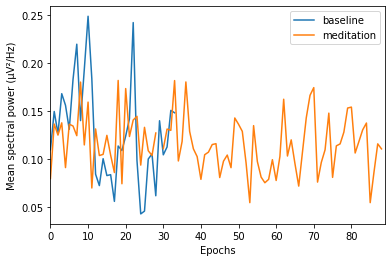

In [68]:
# delta band
plots.plot_bandpower_line(merged_sam_aligned.mean(axis=1).unstack(0).xs('delta', level=0))

In [71]:
# merge Sam2
pre_merge_meditation = meditation_bandpowers_sam2.copy()
pre_merge_baseline = baseline_bandpowers_sam2.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_sam2_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [60]:
# merge Sam3
pre_merge_meditation = meditation_bandpowers_sam3.copy()
pre_merge_baseline = baseline_bandpowers_sam3.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_sam3_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [58]:
# merge Sam4
pre_merge_meditation = meditation_bandpowers_sam4.copy()
pre_merge_baseline = baseline_bandpowers_sam4.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_sam4_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [59]:
# merge Raphaël
pre_merge_meditation = meditation_bandpowers_rap.copy()
pre_merge_baseline = baseline_bandpowers_rap.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_rap_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [56]:
# merge Raphaël2
pre_merge_meditation = meditation_bandpowers_rap2.copy()
pre_merge_baseline = baseline_bandpowers_rap2.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_rap2_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])

In [57]:
# merge Raphaël3
pre_merge_meditation = meditation_bandpowers_rap3.copy()
pre_merge_baseline = baseline_bandpowers_rap3.copy()

pre_merge_meditation.index = pre_merge_meditation.index.set_levels(pd.RangeIndex(len(pre_merge_meditation.index)), level=1)
pre_merge_baseline.index = pre_merge_baseline.index.set_levels(pd.RangeIndex(len(pre_merge_baseline.index)), level=1)

merged_rap3_aligned = pd.concat([pre_merge_baseline, pre_merge_meditation], keys = ['baseline', 'meditation'])